In [95]:
import rosbag
import numpy as np
import sys
import csi_utils.constants as constants
import csi_utils.transform_utils as transform_utils
import csi_utils.pipeline_utils as pipeline_utils
import csi_utils.comp_utils as comp_utils
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.cm import ScalarMappable
# import mne
import tqdm
# import cv2

In [175]:
# Define variables to store your data
comp0 = np.load("./tx0-192.168.43.1-157.npy")
comp = np.load("./192.168.43.1-157.npy")
apply_nts = True
idx = 0
valid_tx_ant = [0,1,2,3]
# mne.beamformer.rap_music()

In [97]:
compInv = 1/comp

In [98]:
#open the experiment1 folder and read all the files into a list
from os import listdir
files = listdir("./csiTesting/experiment1")
files = [file for file in files if file.endswith(".bag")]
bags = [rosbag.Bag(f"./csiTesting/experiment1/{file}") for file in files]
positions = []
for file in files:
  strs = file.split("_")
  strs[3] = strs[3].split(".")[0]
  positions.append([int(strs[1]), int(strs[2]), int(strs[3])])
positions


[[-3, 1, 0],
 [-1, 0, 0],
 [-2, 1, 0],
 [-1, 2, 0],
 [-3, 0, 0],
 [-2, 2, 0],
 [-1, 1, 0],
 [-2, 0, 0],
 [0, 0, 0],
 [0, 1, 0],
 [0, 2, 0],
 [0, 0, 0]]

In [99]:
bagFar = rosbag.Bag("./csiTesting/packetRateTest/100far_2024-03-21-11-12-01.bag")
bagClose = rosbag.Bag("./csiTesting/packetRateTest/100close_2024-03-21-11-14-38.bag")
newClose = rosbag.Bag("./csiTesting/packetRateTest/10close_2024-03-21-11-39-36.bag")
newCloseNomsg = rosbag.Bag("./csiTesting/packetRateTest/10closeNomsg_2024-03-21-11-43-03.bag")
def printRate(bag):
    deltaT = bag.get_end_time() - bag.get_start_time()
    print(bag.get_message_count()/deltaT)
printRate(bagFar)
printRate(bagClose)
printRate(newClose)
printRate(newCloseNomsg)
printRate(rosbag.Bag("./csiTesting/packetRateTest/5closeNomsg_2024-03-21-11-45-20.bag"))
printRate(rosbag.Bag("./csiTesting/packetRateTest/1closeNomsg_2024-03-21-11-49-48.bag"))
printRate(rosbag.Bag("./csiTesting/packetRateTest/5farNomsg_2024-03-21-11-52-19.bag"))
printRate(rosbag.Bag("./csiTesting/packetRateTest/5farSparse_2024-03-21-11-59-22.bag"))

8.023039698849972
8.023255036539313
27.493648776321088
32.29054523631366
39.40048432943238
40.03909634509669
37.917994622365576
39.45049827122306


In [100]:
from irobot_edu_sdk.backend.bluetooth import Bluetooth
from irobot_edu_sdk.robots import event, hand_over, Color, Robot, Root, Create3
from irobot_edu_sdk.music import Note



213it [00:00, 3975.52it/s]


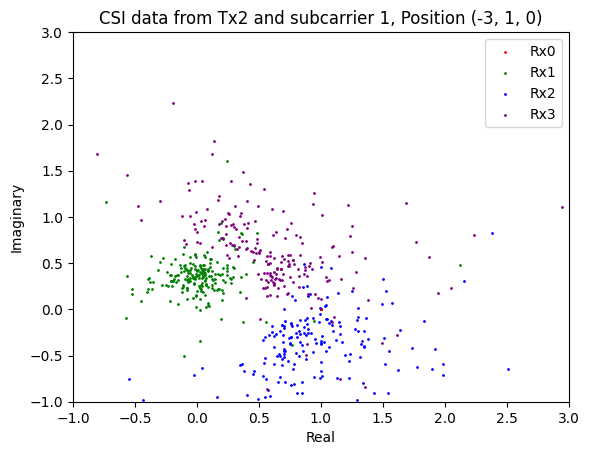

In [101]:
bag1 = rosbag.Bag("./csiTesting/experiment1/CSI_-1_0_0.bag")
bag2 = rosbag.Bag("./csiTesting/experiment1/CSI_-2_0_0.bag")
bag3 = rosbag.Bag("./csiTesting/experiment1/CSI_-3_0_0.bag")
bag4 = rosbag.Bag("./csiTesting/experiment1/CSI_-1_1_0.bag")
bag4 = rosbag.Bag("./csiTesting/experiment1/CSI_-1_1_0.bag")
bag4 = rosbag.Bag("./csiTesting/experiment1/CSI_-1_1_0.bag")
bag4 = rosbag.Bag("./csiTesting/experiment1/CSI_-1_1_0.bag")
def plot_csi_data_complex(bag, tx, subcarrier, title=None, saveName=None):
  allData = {0: [[], []], 1: [[], []], 2: [[], []], 3: [[], []]}
  colors = ["red", "green", "blue", "purple"]
  fig, ax = plt.subplots()
  ax.set(xlim=(-1, 3), ylim=(-1, 3))
  if title == None:
    title = f"CSI data from Tx{tx} and subcarrier {subcarrier}"
  plt.title(title)
  plt.ylabel("Imaginary")
  plt.xlabel("Real")
  num = 0
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      csi = pipeline_utils.extract_csi(msg, comp)
      # print(np.shape(csi))
      benchmark = csi[subcarrier, 0, tx]
      for i in range(0, 4):
          data = csi[subcarrier, i, tx] / benchmark
          allData[i][0].append(data.real)
          allData[i][1].append(data.imag)
      num += 1
            # print(np.abs(csi[subcarrier, i, j]))
      # return
  for i in range(0, 4):
    ax.scatter(allData[i][0], allData[i][1], c=colors[i], label=f"Rx{i}", s=1)
  # ax.scatter(reals, imags, c=colors * num, s=1)
  ax.legend()
  if (saveName == None):
    plt.show()
  else:
    plt.savefig(saveName)
# plot_csi_data_complex(bag1, 2, 1, title=f"CSI data from Tx{2} and subcarrier {1}, Position (-1, 0, 0)")
# plot_csi_data_complex(bag2, 2, 1, title=f"CSI data from Tx{2} and subcarrier {1}, Position (-2, 0, 0)")
# plot_csi_data_complex(bag4, 2, 1, title=f"CSI data from Tx{2} and subcarrier {1}, Position (-3, 0, 0)")
i = 0
pos = positions[i]
plot_csi_data_complex(bags[i], 2, 1, title=f"CSI data from Tx{2} and subcarrier {1}, Position ({pos[0]}, {pos[1]}, {pos[2]})")
# plot_csi_data(bag2, 2, 1)
# for i in range(0, 49):
  # plot_csi_data(bag1, 2, i, f"./csiTesting/normalizedImages/subcarrier{i}.png")

179it [00:00, 3449.41it/s]

SHOWING1


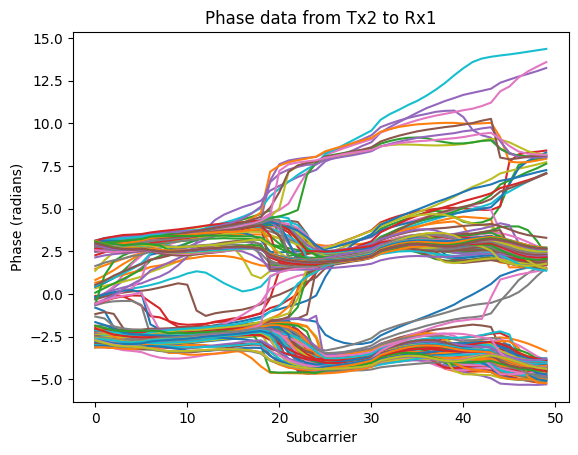

In [217]:
def plot_phase_data(data, tx, rx, normalize=False, ax=None, color='green', title=None, saveName=None, **kwargs):
  allData = {0: [[], []], 1: [[], []], 2: [[], []], 3: [[], []]}
  colors = ["red", "green", "blue", "purple"]
  newplot = False
  if ax == None:
    fig, ax = plt.subplots()
    newplot = True
  if title == None:
    title = f"Phase data from Tx{tx} to Rx{rx}"
  ax.set_title(title)
  if 'xlabel' not in kwargs.keys() or kwargs['xlabel']:
    ax.set_xlabel("Subcarrier")
  if 'ylabel' not in kwargs.keys() or kwargs['ylabel']:
    ax.set_ylabel("Phase (radians)")
  num = 0
  for csi, t in data:
      subcarriers = np.arange(0, 50)
      phases = []
      for subcarrier in range(0, 50):
        benchmark = csi[subcarrier, 0, tx]
        data = csi[subcarrier, rx, tx]
        if normalize:
           data /= benchmark
        phase = np.angle(data)
        phases.append(phase)
      ax.plot(subcarriers, np.unwrap(phases), alpha=1)
      # ax.plot(subcarriers, phases, alpha=0.5)
      num += 1
  if (saveName == None and newplot):
    print("SHOWING1")
    plt.show()
  elif saveName != None:
    plt.savefig(saveName)

def plot_phase(bag, tx, rx, normalize=False, ax=None, color='green', title=None, saveName=None):
  data = []
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      data.append((pipeline_utils.extract_csi(msg), t))
  plot_phase_data(data, tx, rx, normalize, ax, color, title, saveName)
      
# for rx in range(0, 4):
plot_phase(bags[2], 2, 1, True)

In [103]:
def g(no=True, **kwargs):
  print(kwargs)
g(hi=False)

{'hi': False}


179it [00:00, 3176.23it/s]

SHOWING2


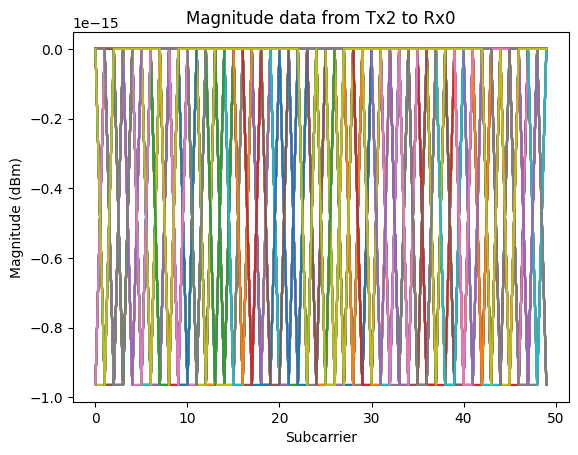

In [336]:
def plot_magnitude_data(data, tx, rx, normalize=False, ax=None, color='green', title=None, saveName=None, **kwargs):
  allData = {0: [[], []], 1: [[], []], 2: [[], []], 3: [[], []]}
  colors = ["red", "green", "blue", "purple"]
  newplot = False
  if ax == None:
    fig, ax = plt.subplots()
    newplot = True
  # ax.set(xlim=(-1, 3), ylim=(-1, 3))
  if title == None:
    title = f"Magnitude data from Tx{tx} to Rx{rx}"
  ax.set_title(title)
  if 'xlabel' not in kwargs.keys() or kwargs['xlabel']:
    ax.set_xlabel("Subcarrier")
  if 'ylabel' not in kwargs.keys() or kwargs['ylabel']:
    ax.set_ylabel("Magnitude (dBm)")
  num = 0
  for csi, t in data:
      subcarriers = np.arange(0, 50)
      magnitudes = []
      for subcarrier in range(0, 50):
        benchmark = csi[subcarrier, 0, tx]
        data = csi[subcarrier, rx, tx]
        if normalize:
           data /= benchmark
        magnitude = 20*np.log10(np.abs(data))
        # magnitude = np.abs(data)
        magnitudes.append(magnitude)
      ax.plot(subcarriers, magnitudes, alpha=1)
      num += 1
  if (saveName == None and newplot):
    print("SHOWING2")
    plt.show()
  elif saveName != None:
    plt.savefig(saveName)

def plot_magnitude(bag, tx, rx, normalize=False, ax=None, color='green', title=None, saveName=None):
  data = []
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      data.append((pipeline_utils.extract_csi(msg, comp), t))
  plot_magnitude_data(data, tx, rx, normalize, ax, color, title, saveName)
      
# for rx in range(0, 4):
plot_magnitude(bags[2], 2, 0, True)

In [105]:
def phase_amplidude_2x4(bag, figure_title="", phaseRange=None, magRange=None, normalize=False):
  fig, axs = plt.subplots(2, 4, figsize=(10, 6),
                            sharey=False, layout='constrained')
  colors = ["red", "green", "blue", "purple"]
  fig.suptitle(figure_title)
  
  for rx in range(0, 4):
    if phaseRange != None:
      axs[0, rx].set_ylim(phaseRange)
    if magRange != None:
      axs[1, rx].set_ylim(magRange)
    plot_phase(bag, 2, rx, normalize, axs[0, rx], colors[rx], f"Rx{rx}")
    plot_magnitude(bag, 2, rx, False, axs[1, rx], colors[rx], "")
  plt.show()
# for bag, pos in zip(bags, positions):
  # phase_amplidude_2x4(bag, f"CSI data from Tx{2}, Position ({pos[0]}, {pos[1]}, {pos[2]})", (-10, 10), (100, 150))

In [106]:
# phase_amplidude_2x4(testBag2, "CSI data from Tx2", (-15, 15), (100, 160))

115it [00:00, 3678.23it/s]


SHOWING5


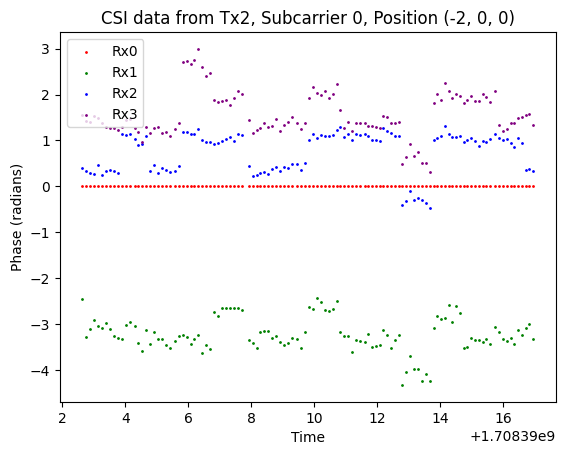

In [107]:
def plot_subcarrier_phase(bag, tx, subcarrier, title=None, saveName=None, invert=False):
  allData = {0: [[], []], 1: [[], []], 2: [[], []], 3: [[], []]}
  colors = ["red", "green", "blue", "purple"]
  fig, ax = plt.subplots()
  if title == None:
    title = f"Phase data from Tx{tx}"
  plt.title(title)
  plt.ylabel("Phase (radians)")
  plt.xlabel("Time")
  num = 0
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      csi = pipeline_utils.extract_csi(msg, comp)
      if invert:
        csi = csi.transpose(0, 2, 1)
      for i in range(0, 4):
          # for subcarrier in range(0, 50):
        benchmark = csi[subcarrier, 0, tx]
        data = csi[subcarrier, i, tx] / benchmark
        phase = np.angle(data)
        allData[i][0].append(t.to_sec())
        allData[i][1].append(phase)
      num += 1
      # break
            # print(np.abs(csi[subcarrier, i, j]))
      # return
  for i in range(0, 4):
    ax.scatter(allData[i][0], np.unwrap(allData[i][1]), c=colors[i], label=f"Rx{i}", s=1, alpha=1)
    # ax.scatter(allData[i][0], np.array(allData[i][1]) + 360, c=colors[i], label=f"Rx{i}", s=1, alpha=0.2)
    # ax.scatter(allData[i][0], np.array(allData[i][1]) - 360, c=colors[i], label=f"Rx{i}", s=1, alpha=0.2)
  # ax.scatter(reals, imags, c=colors * num, s=1)
  ax.legend()
  if (saveName == None):
    print("SHOWING5")
    plt.show()
  else:
    plt.savefig(saveName)
for i in range(0, 10):
  plot_subcarrier_phase(bag4, 2, i, title=f"CSI data from Tx{2}, Subcarrier {i}, Position (-2, 0, 0)")
  break

179it [00:00, 1936.75it/s]


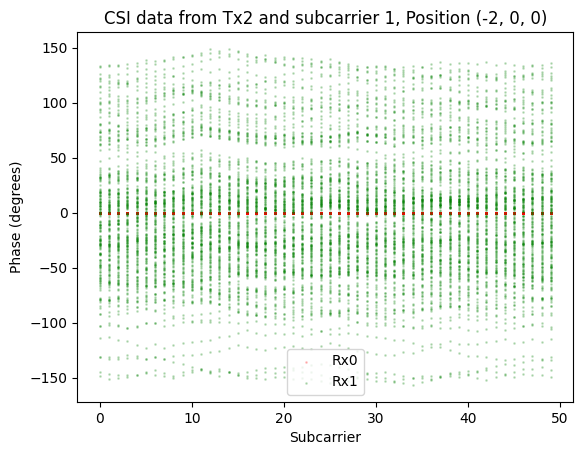

In [108]:
def plot_csi_data_phases_unwrap(bag, tx, title=None, saveName=None):
  allData = {0: [[], []], 1: [[], []], 2: [[], []], 3: [[], []]}
  colors = ["red", "green", "blue", "purple"]
  fig, ax = plt.subplots()
  # ax.set(xlim=(-1, 3), ylim=(-1, 3))
  if title == None:
    title = f"Phase data from Tx{tx}"
  plt.title(title)
  plt.ylabel("Phase (degrees)")
  plt.xlabel("Subcarrier")
  num = 0
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      csi = pipeline_utils.extract_csi(msg, comp)
      # print(np.shape(csi))
      for i in range(0, 4):
          for subcarrier in range(0, 50):
            benchmark = csi[subcarrier, 0, tx]
            data = csi[subcarrier, i, tx] / benchmark
            phase = np.angle(data, True)
            allData[i][0].append(subcarrier)
            allData[i][1].append(phase)
      num += 1
            # print(np.abs(csi[subcarrier, i, j]))
      # return
  for i in range(0, 2):
    ax.scatter(allData[i][0], np.unwrap(allData[i][1]), c=colors[i], label=f"Rx{i}", s=1, alpha=0.2)
    # ax.scatter(allData[i][0], np.array(allData[i][1]) + 360, c=colors[i], label=f"Rx{i}", s=1, alpha=0.2)
    # ax.scatter(allData[i][0], np.array(allData[i][1]) - 360, c=colors[i], label=f"Rx{i}", s=1, alpha=0.2)
  # ax.scatter(reals, imags, c=colors * num, s=1)
  ax.legend()
  if (saveName == None):
    plt.show()
  else:
    plt.savefig(saveName)

plot_csi_data_phases_unwrap(bags[2], 2, title=f"CSI data from Tx{2} and subcarrier {1}, Position (-2, 0, 0)")

In [135]:
timestamps = []
with open("./csiTesting/experiment6-NCSA/poses.txt") as f:
  for line in f.readlines():
    if line[0] == "#":
      continue
    parts = list(map(lambda x: float(x), line.split(" ")))
    if (parts[0] < 1709065780):
      continue
    timestamps.append((parts[0], parts[1], parts[2], parts[3]))
timestamps

[(1715276293.521713, -0.539321, 0.718911, 0.931316),
 (1715276294.321844, -0.539423, 0.715764, 0.930595),
 (1715276294.721905, -0.560918, 0.705213, 0.874751),
 (1715276295.121972, -0.557799, 0.687585, 0.820315),
 (1715276295.322011, -0.532929, 0.668492, 0.806105),
 (1715276295.522052, -0.487544, 0.643075, 0.799953),
 (1715276295.722076, -0.42132, 0.60844, 0.795344),
 (1715276295.922097, -0.354168, 0.576766, 0.794169),
 (1715276296.122128, -0.283249, 0.546705, 0.782021),
 (1715276296.322161, -0.216482, 0.529528, 0.771992),
 (1715276296.522212, -0.159127, 0.51564, 0.77146),
 (1715276296.722233, -0.116985, 0.497277, 0.769859),
 (1715276296.922254, -0.094731, 0.474135, 0.768575),
 (1715276297.122286, -0.10363, 0.443663, 0.769611),
 (1715276297.322318, -0.117037, 0.429026, 0.7819),
 (1715276297.522353, -0.116379, 0.43732, 0.785953),
 (1715276297.722382, -0.099461, 0.468171, 0.798401),
 (1715276297.922419, -0.077195, 0.52108, 0.797482),
 (1715276298.122446, -0.0554, 0.569204, 0.791977),
 (17

In [291]:
testBag2 = rosbag.Bag("./csiTesting/experiment6-NCSA/testTxGround2.bag")

def interpolate_data(bag, timestamps):
  # list of tuples (time, x, y, z, csi, rssi)
  data = []
  upperIndex = 1
  for (topic, msg, t), k in zip(tqdm.tqdm(bag.read_messages('/csi')), bag):
    t = t.to_sec()
    if (t < timestamps[0][0]):
      continue
    if (t > timestamps[-1][0]):
      break
    if (t >= timestamps[upperIndex][0]):
      while (t >= timestamps[upperIndex][0] and upperIndex < len(timestamps) - 1):
        upperIndex += 1
    lowerIndex = upperIndex - 1
    lowerTime, lowerX, lowerY, lowerZ = timestamps[lowerIndex]
    upperTime, upperX, upperY, upperZ = timestamps[upperIndex]
    frac = (t - lowerTime) / (upperTime - lowerTime)
    # print("Frac:", frac)
    x = lowerX + frac * (upperX - lowerX)
    y = lowerY + frac * (upperY - lowerY)
    z = lowerZ + frac * (upperZ - lowerZ)
    csi = pipeline_utils.extract_csi(msg, comp)
    # csi = pipeline_utils.extract_csi(msg, None)
    rssi = k[1].rssi
    data.append((t, x, y, z, csi, rssi))
  return data
allData = interpolate_data(testBag2, timestamps)
# print(timeToPositionToCSI[0])
for i in allData:
  print(i[1])
# print(allData[2])

2707it [00:00, 3460.53it/s]

0.08344744121275861
0.08345538003810084
0.08346139371173272
0.08346735445320419
0.08347333359965867
0.08348141124708197
0.08348731910395113
0.08349328231844358
0.08349935467876544
0.08350536031507919
0.08351126874264549
0.08351727147791538
0.08352319550453705
0.08352916932448481
0.08353527996907366
0.08354114725888726
0.08354713477556655
0.08355313979362504
0.08355911018938993
0.08356521060898821
0.08357308323346134
0.08357904801737094
0.0835850943634145
0.0835910082601618
0.08359701689263556
0.08360299175886143
0.08360896367648538
0.0836169651833976
0.08362290723453751
0.08362892942106852
0.08363690900369866
0.08364482290859877
0.08365286750314563
0.08366082273603083
0.08366881753725158
0.0836769989564395
0.08368481184794455
0.08369279837405666
0.08370075512880092
0.08370871188354517
0.08371668613966862
0.08372466957450451
0.08373263893214411
0.08374066607286988
0.08374861816692077
0.08375669453027548
0.08376458855589164
0.08377251767938235
0.08378097916819532
0.08378851355949246
0.08

2707it [00:00, 3405.80it/s]


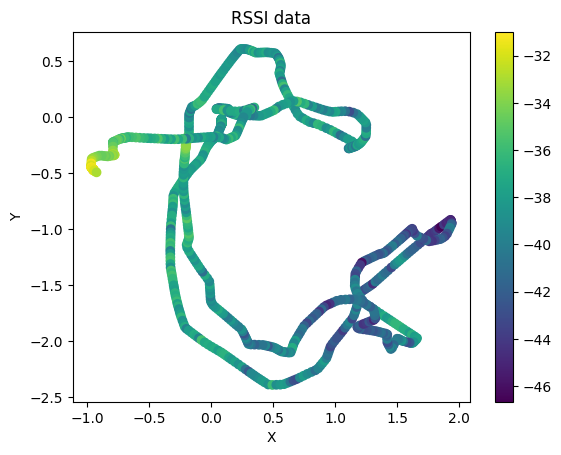

In [295]:
from mpl_toolkits.mplot3d import Axes3D
def consolidate(data, n=10):
  newData = []
  for i in range(0, len(data), n):
    sum = 0
    for j in range(0, n):
      if (i + j >= len(data)):
        n = j
        break
      sum += data[i+j]
    newData.append(sum / n)
  return newData

def consolidateSOA(data, n=10):
  newData = []
  for d in data:
    newData.append(consolidate(d, n))
  return newData


def get_median_magnitude(csi, rx):
  sum = 0
  allMagnitudes = [csi[subcarrier, rx, 2] for subcarrier in range(0, 50)]
  allMagnitudes.sort()
  return 20*np.log10(np.abs(allMagnitudes[25]))

def get_mean_magnitude(csi, rx):
  sum = 0
  allMagnitudes = [csi[subcarrier, rx, 2] for subcarrier in range(0, 50)]
  for data in allMagnitudes:
    sum += 20*np.log10(np.abs(data))
    # sum += np.abs(data)
  return sum / 50

def plot_3d_data(plotData, i=None, ax=None, title=None, savename=None):
  fig = None
  newPlot = False
  if ax == None:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    newPlot = True
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")
  ax.set_xlim(-1.5, 1.5)
  ax.set_ylim(-2, 1)
  ax.set_zlim(0, 3)
  if title == None:
    # title = f"Magnitude of CSI data from Tx2 (Mean over subcarriers)"
    title = f"RSSI data"
  ax.set_title(title)
  sc = ax.scatter(plotData[0], plotData[1], plotData[2], c=plotData[3], cmap="viridis", alpha=0.5)
  if i != None:
    ax.scatter(plotData[0][i], plotData[1][i], plotData[2][i], color="red", s=100)
  if fig != None:
    fig.colorbar(sc)
  # ax.set_box_aspect((1,1,1))
  # ax.azim = 20
  if (savename == None and newPlot):
    plt.show()
  elif savename != None:
    plt.savefig(savename)

def plot_2d_data(plotData, i=None, ax=None, title=None, savename=None):
  fig = None
  newPlot = False
  if ax == None:
    fig = plt.figure()
    ax = fig.add_subplot()
    newPlot = True
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  # ax.set_xlim(-1.5, 1.5)
  # ax.set_ylim(-3, 2)
  if title == None:
    # title = f"Magnitude of CSI data from Tx2 (Mean over subcarriers)"
    title = f"RSSI data"
  ax.set_title(title)
  sc = ax.scatter(plotData[0], plotData[1], c=plotData[3], cmap="viridis", alpha=1)
  if i != None:
    ax.scatter(plotData[0][i], plotData[1][i], color="red", s=100)
  if fig != None:
    fig.colorbar(sc)
  # ax.set_box_aspect((1,1,1))
  # ax.azim = 20
  if (savename == None and newPlot):
    plt.show()
  elif savename != None:
    plt.savefig(savename)
  return sc

def get_plot_data(combinedData):
  plotData = [[], [], [], []]
  for time, x, y, z, csi, rssi in combinedData:
    # magnitude = (get_mean_magnitude(csi, 0) + get_mean_magnitude(csi, 1) + get_mean_magnitude(csi, 2) + get_mean_magnitude(csi, 3))/4
    magnitude = rssi
    plotData[0].append(x)
    plotData[1].append(y)
    plotData[2].append(z)
    plotData[3].append(magnitude)
  return plotData

def plot_csi_data_3d(bag, timestamps, ax=None, title=None, savename=None):
  combinedData = interpolate_data(bag, timestamps)
  plotData = get_plot_data(combinedData)
  plotData = np.array(consolidateSOA(plotData, 3))
  plot_3d_data(plotData, ax, title, savename)

def plot_csi_data_2d(bag, timestamps, ax=None, title=None, savename=None):
  combinedData = interpolate_data(bag, timestamps)
  plotData = get_plot_data(combinedData)
  plotData = np.array(consolidateSOA(plotData, 3))
  plot_2d_data(plotData, ax, title, savename)

plot_csi_data_2d(testBag2, timestamps)


/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))


SHOWING


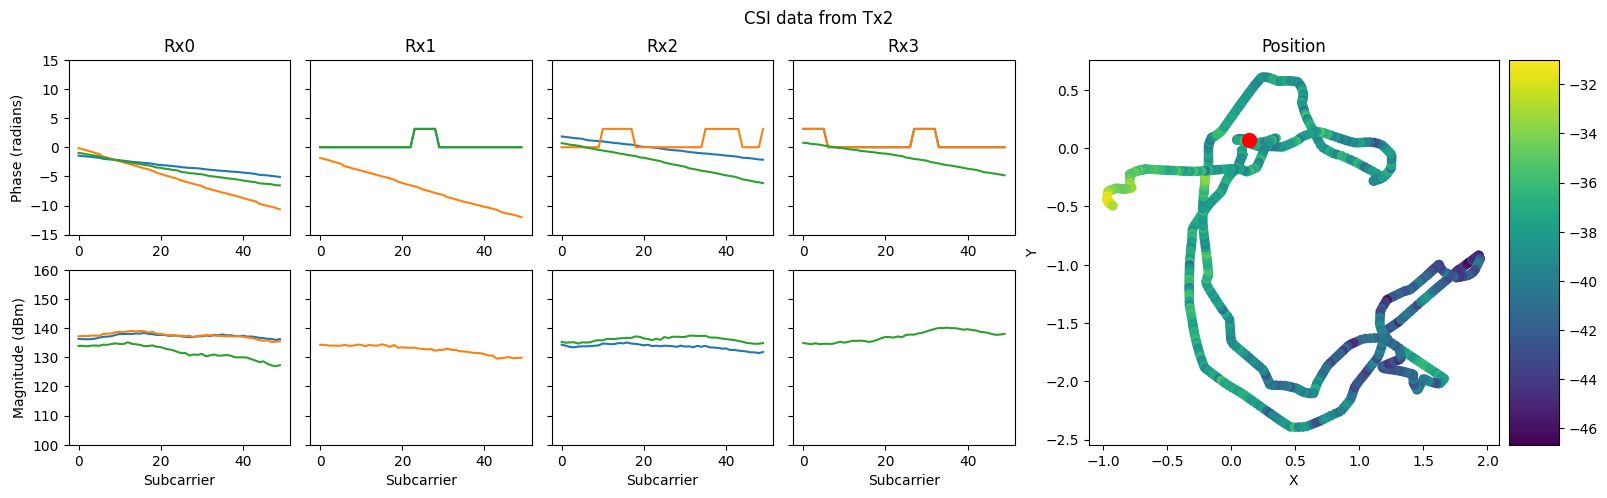

902


/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20*np.log10(np.abs(data))
/var/folders/37/n9bfxstj5h3_3cjv9jfn80p80000gp/T/ipykernel_2787/4225646456.py:25: RuntimeWarning: divide by zero encountered in lo

In [348]:
def generate_frame(consolidatedData, frame, phaseRange=None, magRange=None, saveName=None, threeD=False, tx=2):
  frameSize = 3
  fig = plt.figure(figsize=(20, 5))
  axs = [[], []]
  for i in range(0, 4):
    axs[0].append(fig.add_subplot(2, 13, (2 * i + 1, 2 * i + 2)))
    axs[1].append(fig.add_subplot(2, 13, (2 * i + 14, 2 * i + 15)))
  
  fig.suptitle(f"CSI data from Tx{tx}")
  part = consolidatedData[frame * frameSize:frame * frameSize + frameSize]
  data = [(part[4], part[0]) for part in part]
  for rx in range(0, 4):
    if phaseRange != None:
      axs[0][rx].set_ylim(phaseRange)
    if magRange != None:
      axs[1][rx].set_ylim(magRange)
    ylabel = True
    if rx > 0:
      axs[0][rx].set_yticklabels([])
      axs[1][rx].set_yticklabels([])
      ylabel = False
    plot_phase_data(data, tx, rx, False, axs[0][rx], "helli", f"Rx{rx}", ylabel=ylabel, xlabel=False)
    plot_magnitude_data(data, tx, rx, False, axs[1][rx], "hello", "", ylabel=ylabel)
  if threeD:
    thingy = fig.add_subplot(1, 3, 3, projection='3d')
    thingy.set_title("OOPS")
    plot_3d_data(np.array(consolidateSOA(get_plot_data(consolidatedData), frameSize)), i=frame, ax=thingy, title="Position")
  else:
    thingy = fig.add_subplot(1, 26, (18, 24))
    thingy.set_title("OOPS")
    cBar = fig.add_subplot(1, 26, 25)
    sc = plot_2d_data(np.array(consolidateSOA(get_plot_data(consolidatedData), frameSize)), i=frame, ax=thingy, title="Position")
    fig.colorbar(sc, cax=cBar, orientation='vertical')
  if saveName == None:
    print("SHOWING")
    plt.show()
  else:
    plt.savefig(saveName)
    plt.close()


generate_frame(allData, 734, (-15, 15), (100, 160), threeD=False, tx=2)
numFrames = int(len(allData) / 3)
print(numFrames)
for i in range(0, numFrames):
  generate_frame(allData, i, (-15, 15), (100, 160), f"./consolidatedFrames/frame{i}.png")

In [352]:
import cv2
code = cv2.VideoWriter_fourcc(*'M4S2')
out = cv2.VideoWriter("groundTestVideo2.mp4", code, 5, (2000, 500))
for i in range(0, numFrames):
  frame = cv2.imread(f"./consolidatedFrames/frame{i}.png")
  out.write(frame)
  print("Thing")
out.release()


OpenCV: FFMPEG: tag 0x3253344d/'M4S2' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thing
Thin

In [114]:
def draw_channel_image_4x4(channel_1, channel_2):
    print("afad")
    num_tx_slots = channel_1.shape[2]
    num_rx_slots = channel_1.shape[1]
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    fig, axs = plt.subplots(num_tx_slots*2, num_rx_slots, figsize=(24, 24),
                            gridspec_kw={'height_ratios': [1, 0.7] * num_tx_slots})
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    amplitude_1 = (np.abs(channel_1))
    amplitude_2 = (np.abs(channel_2))
    min_amp = min(np.min(amplitude_1), np.min(amplitude_2))
    max_amp = max(np.max(amplitude_1), np.max(amplitude_2))
    phase_1 = np.unwrap(np.angle(channel_1))
    phase_2 = np.unwrap(np.angle(channel_2))
    min_phase = min(np.min(phase_1), np.min(phase_2))
    max_phase = max(np.max(phase_1), np.max(phase_2))
    print(min_phase, max_phase)
    for i in range(0, num_tx_slots*2, 2):
        for j in range(num_rx_slots):
            if i == 0:
                # Place Rx antenna labels at the top
                axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
            if j == 0:
                # Place Tx antenna labels on the left 
                axs[i, j].text(-0.2, 0, f"Tx Ant {i//2}", va='center', ha='center',
                               rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
            # plot magnitude
            axs[i, j].set_xlabel("Subcarrier indices")
            axs[i, j].set_ylabel("Magnitude (dB)")
            axs[i, j].set_ylim(min_amp-10, max_amp+10)
            # axs[i, j].plot(20*np.log10(np.abs(channel_1[:, j, i//2])),
            #                label="LOS")
            axs[i, j].plot((np.abs(channel_1[:, j, i//2])),
                           label="LOS")
            # axs[i, j].plot(20*np.log10(np.abs(channel_2[:, j, i//2])),
                        #    label="NLOS")
            axs[i, j].legend()
            # plot phase
            axs[i+1, j].set_xlabel("Subcarrier indices")
            axs[i+1, j].set_ylabel("Phase (deg)")
            axs[i+1, j].set_ylim(min_phase, max_phase)
            axs[i+1, j].set_yticks(y_tick_positions)
            axs[i+1, j].set_yticklabels(y_tick_labels)
            # don't wrap 
            # axs[i+1, j].plot(np.angle(channel_1[:, j, i//2]),
            #                  label="LOS")
            # axs[i+1, j].plot(np.angle(channel_2[:, j, i//2]),
            #                  label="NLOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_1[:, j, i//2])),
                             label="LOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_2[:, j, i//2])),
                             label="NLOS2")
            axs[i+1, j].legend() 
    fig.set_tight_layout(True)   
    plt.savefig('40 157 los vs nlos.png')
    plt.show()
   

def draw_amplitude_4x4(channel, figure_title=""):
    print("afad")
    num_tx_slots = channel.shape[2]
    num_rx_slots = channel.shape[1]
    fig, axs = plt.subplots(num_tx_slots, num_rx_slots, figsize=(24, 24),
                            sharey=True, layout='constrained')
    fig.suptitle(figure_title, fontsize=24)
    # add tick for phase plot
    amplitude = (np.abs(channel))
    min_amp = np.min(amplitude)
    max_amp = np.max(amplitude)
    for i in range(num_tx_slots):
        for j in range(num_rx_slots):
            if i == 0:
                # Place Rx antenna labels at the top
                axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
            if j == 0:
                # Place Tx antenna labels on the left 
                axs[i, j].text(-0.2, 0.5, f"Tx Ant {i}", va='center', ha='center',
                               rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
                
            # plot magnitude
            axs[i, j].set_xlabel("Subcarrier indices")
            axs[i, j].set_ylabel("Magnitude")
            axs[i, j].set_ylim(min_amp-10, max_amp+10)
            axs[i, j].plot((np.abs(channel[:, j, i])),
                           label="LOS")
            axs[i, j].legend()
    fig.set_tight_layout(True)   
    # plt.savefig('40 157 los vs nlos.png')
    plt.show()

In [115]:
def draw_amplitudes_4x4(bag, figure_title="", average=False, fig=None, axs=None, show=True, min_a=None, max_a=None):
    print("afad")
    num_tx_slots = 4
    num_rx_slots = 4
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    if (fig is None):
        fig, axs = plt.subplots(num_tx_slots, num_rx_slots, figsize=(24, 24),
                            sharey=True, layout='constrained')
        fig.suptitle(figure_title, fontsize=24)
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    # amplitude = (np.abs(channel))
    min_amp = 1000
    max_amp = -1000
    # phase = np.unwrap(np.angle(channel))
    # min_phase = np.min(phase)
    # max_phase = np.max(phase)
    
    for i in range(num_tx_slots):
        for j in range(num_rx_slots):
                if i == 0:
                    # Place Rx antenna labels at the top
                    axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
                if j == 0:
                # Place Tx antenna labels on the left 
                    axs[i, j].text(-0.2, 0.5, f"Tx Ant {i}", va='center', ha='center',
                rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
                k = 20
                if not average:
                    for data in bag:
                        channel = pipeline_utils.extract_csi(data[1], comp, False, valid_tx_ant)
                        amplitude = (np.abs(channel))
                        min_amp = min(np.min(amplitude), min_amp)
                        max_amp = max(np.max(amplitude), max_amp)
                        # axs[i, j].plot((np.abs(channel[:, j, i])), label="l")
                        axs[i, j].plot((amplitude[:, j, i]), label="l")
                        k += 1
                        # if k == 30:
                        #     break
                else:
                    totalValues = None
                    for data in bag:
                        channel = pipeline_utils.extract_csi(data[1], None, False, valid_tx_ant)
                        if totalValues is None:
                            totalValues = channel
                        else:
                            totalValues += channel
                        k += 1
                        # if k == 30:
                        #     break
                    amplitude = (np.abs(totalValues))
                    min_amp = min(np.min(amplitude), min_amp)
                    max_amp = max(np.max(amplitude), max_amp)
                    # axs[i, j].plot((np.abs(channel[:, j, i])), label="l")
                    axs[i, j].plot((amplitude[:, j, i]), label="l")
                     

    for i in range(num_tx_slots):
        for j in range(num_rx_slots):    
            # plot magnitude
            axs[i, j].set_xlabel("Subcarrier indices")
            axs[i, j].set_ylabel("Magnitude")
            if (min_a != None):
                  min_amp = min_a
            if (max_a != None):
                  max_amp = max_a
            mi, ma = axs[i, j].get_ylim()
            axs[i, j].set_ylim(min(mi,min_amp-10), max(ma, max_amp+10))

                # axs[i, j].legend()
    fig.set_tight_layout(True)   
    # plt.savefig('40 157 los vs nlos.png')
    if show:
        plt.show()

In [116]:
def draw_phasees_4x4(bag, figure_title="", average=False, fig=None, axs=None, show=True, min_a=None, max_a=None):
    print("afad")
    num_tx_slots = 4
    num_rx_slots = 4
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    if (fig is None):
        fig, axs = plt.subplots(num_tx_slots, num_rx_slots, figsize=(24, 24),
                            sharey=True, layout='constrained')
        fig.suptitle(figure_title, fontsize=24)
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    # amplitude = (np.abs(channel))
    # phase = np.unwrap(np.angle(channel))
    # min_phase = np.min(phase)
    # max_phase = np.max(phase)
    
    for i in range(num_tx_slots):
        for j in range(num_rx_slots):
                if i == 0:
                    # Place Rx antenna labels at the top
                    axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
                if j == 0:
                # Place Tx antenna labels on the left 
                    axs[i, j].text(-0.2, 0.5, f"Tx Ant {i}", va='center', ha='center',
                rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
                k = 20
                for data in bag:
                    channel = pipeline_utils.extract_csi(data[1], comp)
                    phase = (np.angle(channel))
                    # axs[i, j].plot((np.abs(channel[:, j, i])), label="l")
                    axs[i, j].plot((phase[:, j, i]), label="l")
                    k += 1
                    # if k == 30:
                        # break
                     

                    
                # plot magnitude
                axs[i, j].set_xlabel("Subcarrier indices")
                axs[i, j].set_ylabel("Phase")

                # axs[i, j].legend()
    fig.set_tight_layout(True)   
    # plt.savefig('40 157 los vs nlos.png')
    if show:
        plt.show()
# draw_phasees_4x4(txCompBag, "Hey")

afad


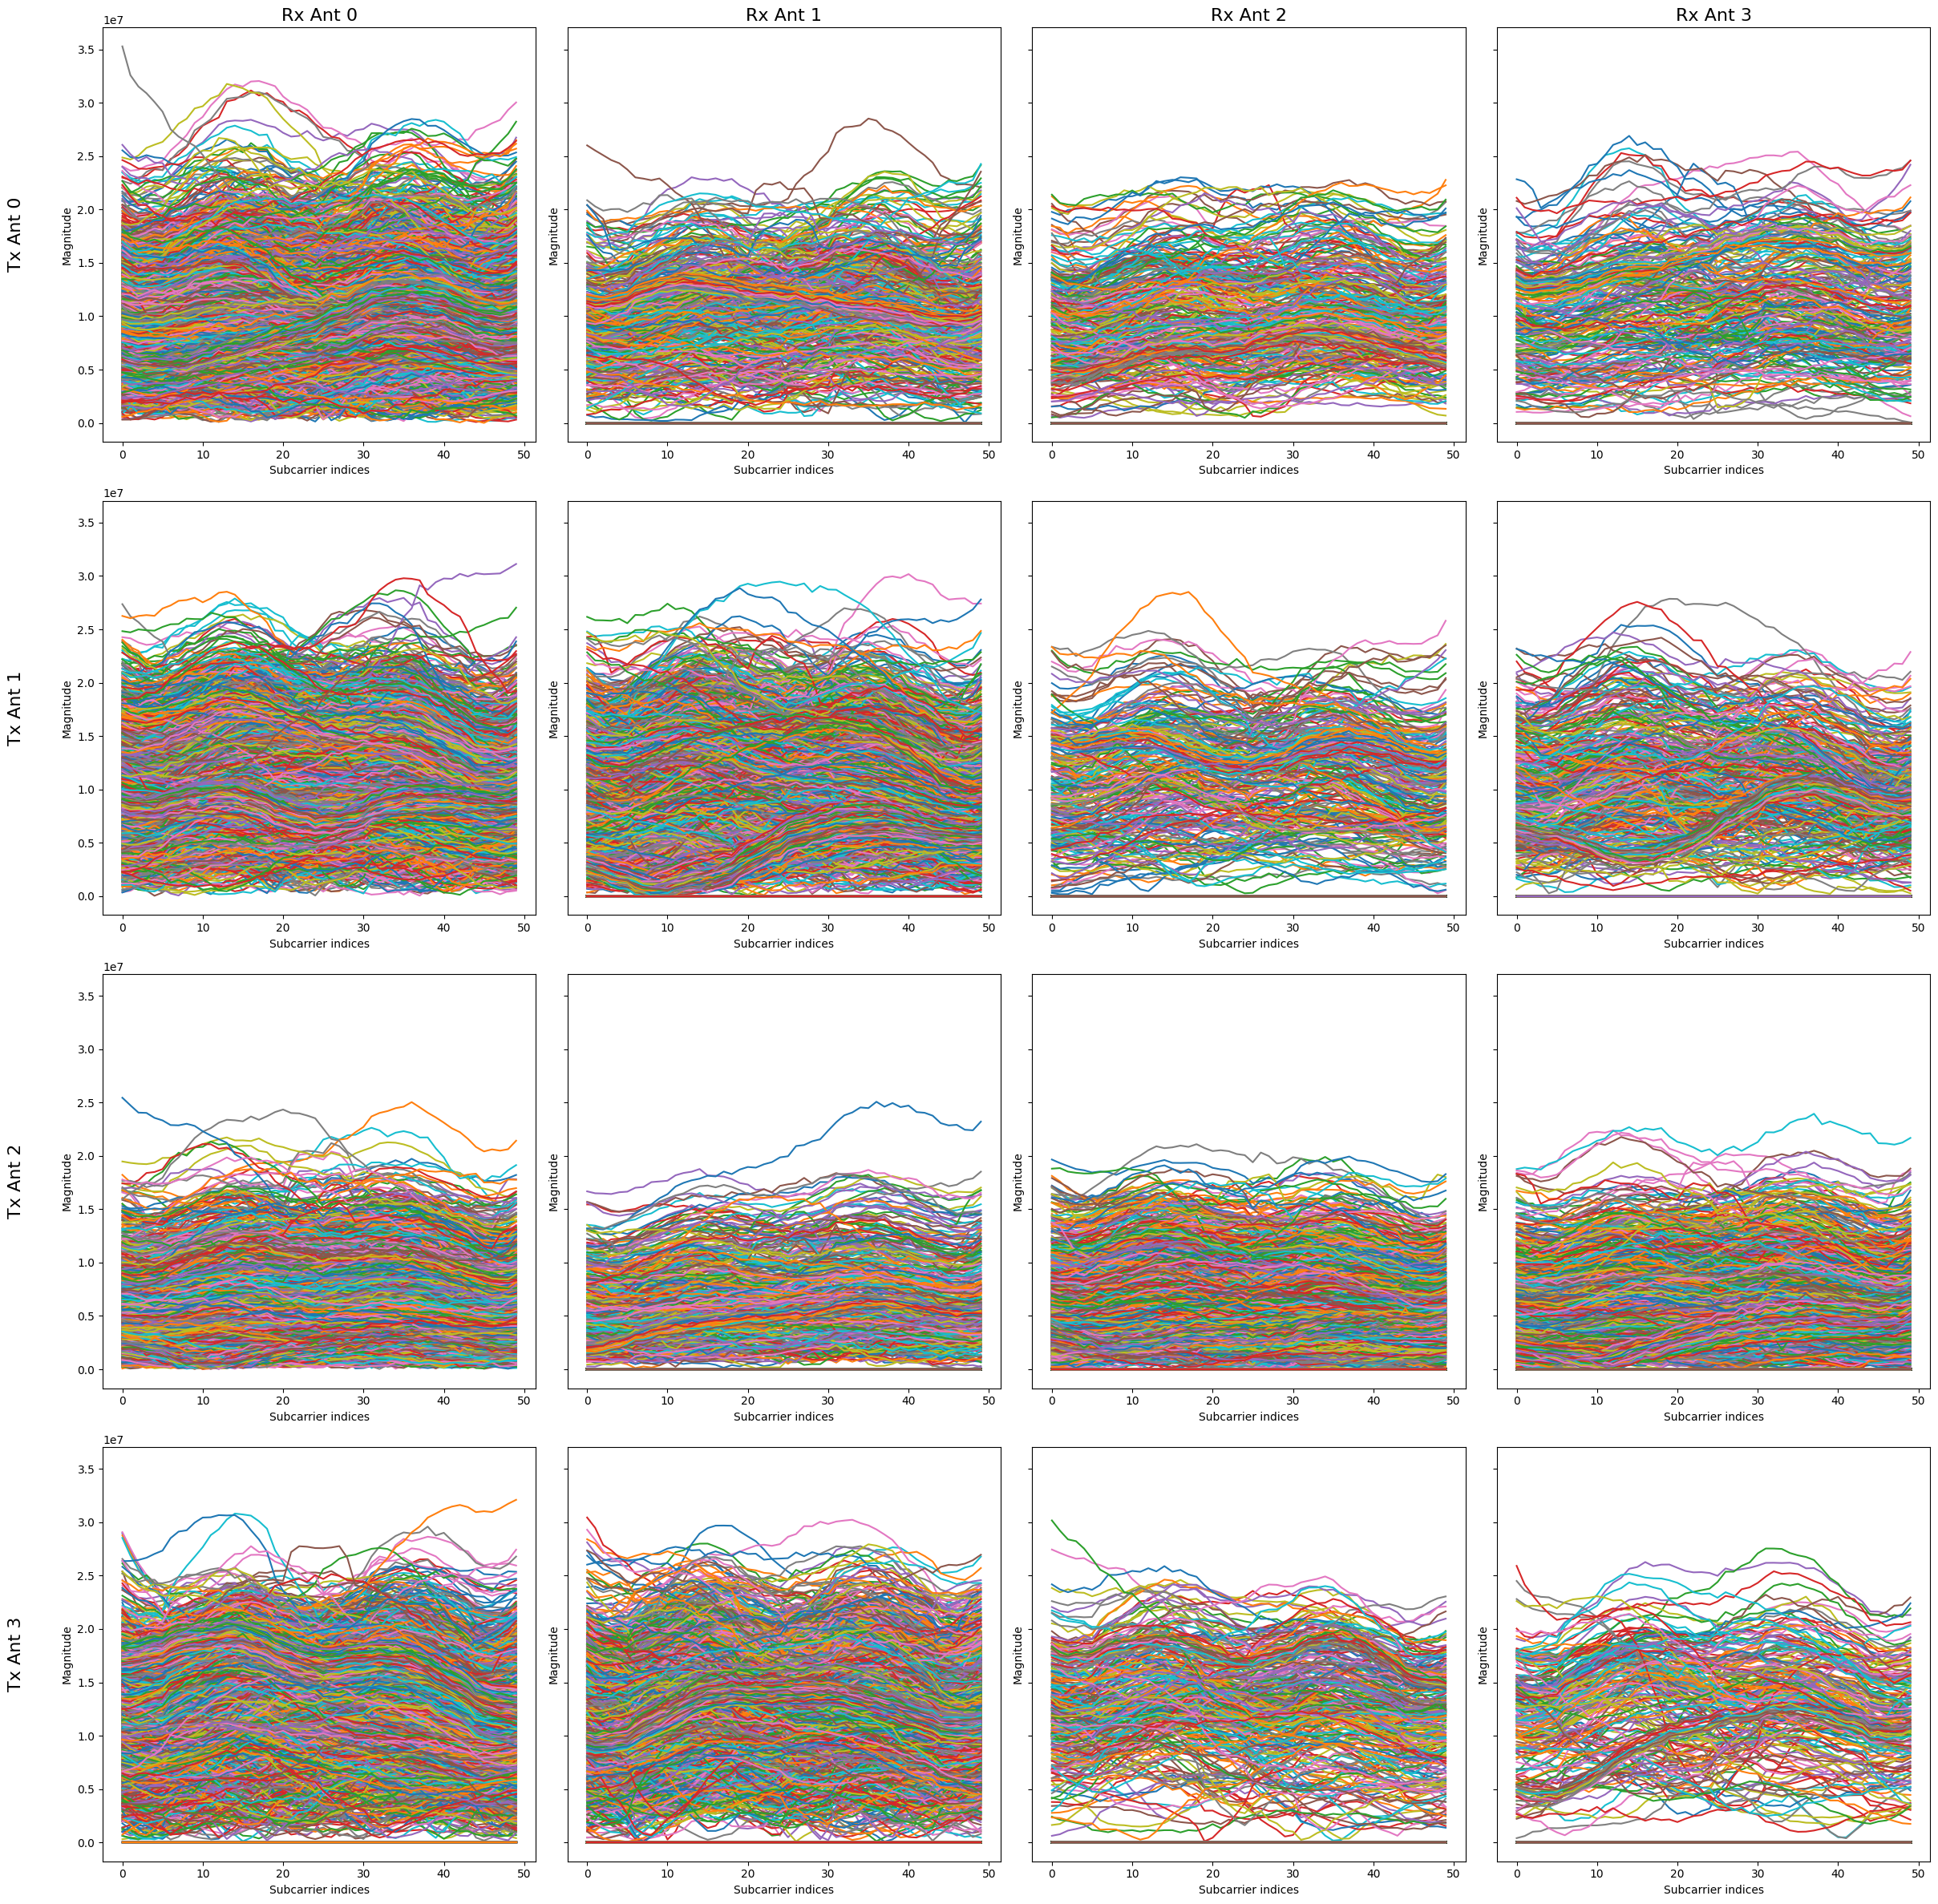

In [177]:
compBag = rosbag.Bag("./csiTesting/experiment6-NCSA/compensationTx0.bag")
ground1Bag = rosbag.Bag("./csiTesting/experiment6-NCSA/testTxGround.bag")

draw_amplitudes_4x4(ground1Bag, average=False, min_a=0, max_a=3e7)

In [118]:
import matplotlib.patches as mpatches

1075it [00:00, 4259.59it/s]


(993,) (1075,) (1075,)


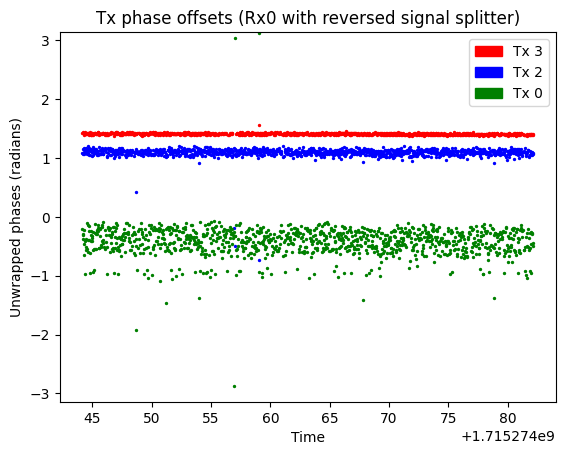

In [119]:

subcarrier = 20
k = 0
# txAirBag = rosbag.Bag("./csiTesting/experiment5-AoD/txCalibrationAirChannel2.bag")
txAirBag = rosbag.Bag("./csiTesting/experiment5-AoD/combinerTestVeryLong.bag")
txBag2 = rosbag.Bag("./csiTesting/experiment5-AoD/combinerTestRx0again.bag")
txBag1 = rosbag.Bag("./csiTesting/experiment5-AoD/combinerTestRx1.bag")
txBagNCSA = rosbag.Bag("./csiTesting/experiment6-NCSA/combinerRx0.bag")
# rx = 3
for bag, rx in [(txBagNCSA, 0)]:
#   rx = 0
  fig, ax = plt.subplots()
  angles   = []
  angles2 = []
  angles3 = []
  times = []
  times2 = []
  times3 = []
  for topic, msg, t in tqdm.tqdm(bag):
      csi = pipeline_utils.extract_csi(msg, None)
      benchmark = csi[subcarrier][rx][1]
      if (benchmark == 0):
          continue
    #   value1 = csi[subcarrier][2][3] / benchmark
      value1 = csi[subcarrier][rx][3] / benchmark
      if (value1 != 0):
          angles.append(np.angle(value1))
          times.append(t.to_sec())

    #   value2 = csi[subcarrier][3][2] / benchmark
      value2 = csi[subcarrier][rx][2] / benchmark
      if (value2 != 0):
          angles2.append(np.angle(value2))
          times2.append(t.to_sec())

    #   value3 = csi[subcarrier][1][0] / benchmark
      value3 = csi[subcarrier][rx][0] / benchmark
      if (value3 != 0):
          angles3.append(np.angle(value3))
          times3.append(t.to_sec())
      # ax.scatter(value.real, value.imag, s=4)

      # ax.scatter(t.to_sec(), np.angle(value))
      # print(value)
      # if k == 30:
          # break
    #   k += 1

  angles = np.array(angles)
#   angles = np.unwrap(angles)

  angles2 = np.array(angles2)
#   angles2 = np.unwrap(angles2)

  angles3 = np.array(angles3)
#   angles3 = np.unwrap(angles3)
  # times = np.array(times)
  ax.scatter(times, angles, s=2, c='red')
  ax.scatter(times2, angles2, s=2, c='blue')
  ax.scatter(times3, angles3, s=2, c='green')

  ax.set_ylabel("Unwrapped phases (radians)")
  ax.set_xlabel("Time")
  ax.set_title("Tx phase offsets (Rx0 with reversed signal splitter)")
  ax.set_ylim(-np.pi, np.pi)

  red_patch = mpatches.Patch(color='red', label='Tx 3')
  blue_patch = mpatches.Patch(color='blue', label='Tx 2')
  green_patch = mpatches.Patch(color='green', label='Tx 0')


  plt.legend(handles=[red_patch, blue_patch, green_patch])

  print(np.shape(angles), np.shape(angles2), np.shape(angles3))
  plt.show()
#   break
# angles
    

ALGORITHM: aoa


933it [00:00, 2986.00it/s]


Packets: 933
ALGORITHM: aoa


933it [00:00, 3235.45it/s]


Packets: 933


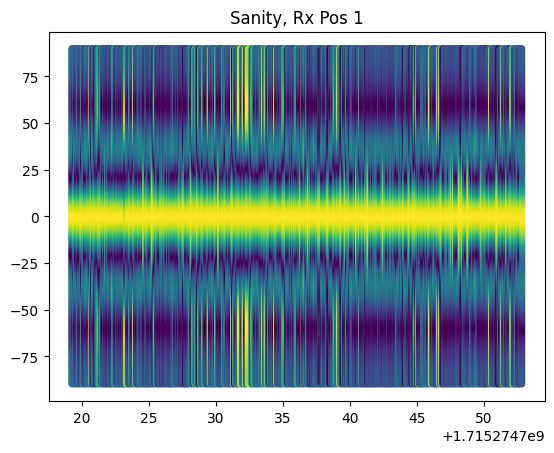

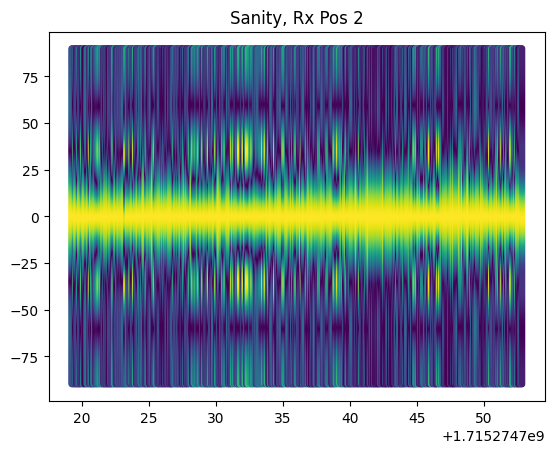

In [176]:
rx_pos_1 = np.asarray([0,  0,
    0,  -0.06,
    0,  -0.03,
    0,  -0.09]).reshape((-1,2))

rx_pos_2 = np.asarray([0,  0,
    0,  -0.09,
    0,  -0.03,
    0,  -0.06]).reshape((-1,2))


profile1 = get_angle_profiles(compBag, "aoa", smoothing_window=10, compensation=comp, rx_positions=rx_pos_1)
profile2 = get_angle_profiles(compBag, "aoa", smoothing_window=10, compensation=comp, rx_positions=rx_pos_2)
# bag1 = rosbag.Bag("./csiTesting/experiment6-NCSA/testTxGround.bag")
# bag2 = rosbag.Bag("./csiTesting/experiment6-NCSA/testTxGround2.bag")

plot_angle_profiles(profile1, "Sanity, Rx Pos 1")
plot_angle_profiles(profile2, "Sanity, Rx Pos 2")

# plot_angle_profiles(get_angle_profiles(bag1, "music", smoothing_window=10, compensation=comp, rx_positions=rx_pos_1), "Ground Experiment 2, Rx Pos 1")
# plot_angle_profiles(get_angle_profiles(bag1, "music", smoothing_window=10, compensation=comp, rx_positions=rx_pos_2), "Ground Experiment 2, Rx Pos 2")

In [121]:
# draw_amplitudes_4x4(txBag1, "Yo")

In [122]:
def compare_amplitudes_4x4(bags, figure_title=""):
    fig, axs = plt.subplots(4, 4, figsize=(24, 24),
                            sharey=True, layout='constrained')
    fig.suptitle(figure_title, fontsize=24)
    for bag in bags:
        print("drawing bag")
        draw_amplitudes_4x4(bag, "", True, fig, axs, False)
    for i in range(4):
        for j in range(4):
            axs[i, j].legend([f"Location {k}" for k in range(1, 6)])
    plt.show()

In [123]:
# headon = rosbag.Bag("../HeadOn.bag")
# ninetydeg = rosbag.Bag("../90deg2.bag")
# fortyfive = rosbag.Bag("../45deg.bag")
# nfortyfive = rosbag.Bag("../n45deg.bag")

#aoa search space
theta_space = np.linspace(-np.pi/2,np.pi/2,360)
#tof search space
tof_space = np.linspace(-40,40,240)

#antenna position (interleaved x-y), see antennas.md
# rx_pos = np.asarray([0,  0,
#     0,  -0.06,
#     0,  -0.03,
#     0,  -0.09]).reshape((-1,2))
rx_pos = np.asarray([0,  0,
    0,  -0.09,
    0,  -0.03,
    0,  -0.06]).reshape((-1,2))
channels = {}
times = {}
aoas = {}
rssis = {}
profs = {}
aoa_sensors = {}


In [124]:
print(np.shape(comp))
print(comp[0])

(50, 4, 1)
[[ 0.98944875-0.1448833j ]
 [ 0.98202377+0.18875728j]
 [-0.7854201 -0.61896305j]
 [-0.08543679+0.99634359j]]


In [125]:
np.shape(comp)
comp[2]

array([[ 0.99862157+0.05248769j],
       [ 0.91026555+0.41402491j],
       [-0.64683701-0.76262827j],
       [-0.2773651 +0.96076459j]])

In [126]:
def get_angle_profiles(bag, algorithm, subcarriers = range(0, 50), txs=[0, 1, 2, 3], smoothing_window=1, compensation = comp, rx_positions=rx_pos, invert = False, conjugate=False):
  """Returns a list of [(time, [angles], [profile])] for each packet

  Arguments:
  - bag: The bag with csi data to get the angle profiles from
  - algorithm: The algorithm to use to get the angle likelihood ("music", "aoa", "fft")
  - subcarriers: The subcarriers to use for the algorithm. Should be a subset of the integers from 0 to 49
  """
  print("ALGORITHM:", algorithm)
  num = 0
  data = []
  aoa_sensor = None
  if algorithm == "music":
    aoa_sensor = transform_utils.music_aoa_sensor_1d(rx_positions, theta_space, smoothing_window)
    # aoa_sensor.prof_dim = 4
  elif algorithm == "aoa":
    aoa_sensor = transform_utils.aoa_sensor_1d(rx_positions, theta_space, smoothing_window)
  elif algorithm == "fft":
    aoa_sensor = transform_utils.fft_aoa_sensor(rx_positions, theta_space, smoothing_window)
  elif algorithm == "othermusic":
    tofs = np.linspace(-40, 40, 180)
    aoa_sensor = transform_utils.full_music_aoa_sensor(rx_positions, theta_space, tofs, smoothing_window)
  for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      csi = pipeline_utils.extract_csi(msg, compensation)
      if invert:
        csi = csi.transpose(0, 2, 1)
      if conjugate:
        csi = csi.conjugate()
      #assuming this does not change
      if algorithm == "othermusic":
        res = aoa_sensor(csi, (msg.chan, msg.bw*1e6))
        # print("Channel:", msg.chan, " BW:", msg.bw*1e6)
      elif algorithm == "aoa" or algorithm == "music":
        res = aoa_sensor.run(csi, (msg.chan, msg.bw*1e6), subcarriers=subcarriers, txs=txs)
      else:
        res = aoa_sensor.run(csi,(msg.chan,msg.bw*1e6), subcarriers=subcarriers)
      num += 1
      data.append((t.to_sec(), theta_space * 180 / np.pi, res[1]))
  print("Packets:", num)
  return data

def plot_angle_profiles(data, title, ax=None, tof_indices = None, savename=None, **kwargs):
  """Plots a list of [(time, [angles], [profile])]"""
  newPlot = False
  if ax == None:
    fig, ax = plt.subplots()
    newPlot = True
  ax.set_title(title)
  if 'ylabel' in kwargs and kwargs['ylabel']:
    ax.set_ylabel("Angle (degrees)")
  if 'xlabel' in kwargs and kwargs['xlabel']:
    ax.set_xlabel("Time")
  for time, angles, profile in data:
    if tof_indices is not None:
      start_i = tof_indices[0]
      end_i = tof_indices[1]
      ax.scatter([time] * len(angles), angles, c=np.max(profile[:, start_i:end_i], axis=1), s=10)
    else:
      ax.scatter([time] * len(angles), angles, c=profile, s=10)
  if savename is not None:
    plt.savefig(savename)
  elif newPlot:
    plt.show()

def plot_angle_distance_profile(profile, title="", ax=None, savename=None):
  newPlot = False
  if ax == None:
    fig, ax = plt.subplots()
    newPlot = True
  ax.set_title(title)
  ax.set_xlabel("Angle (degrees)")
  ax.set_ylabel("Distance (meters)")
  for i, angleArray in enumerate(profile):
    for (j, value) in enumerate(angleArray):
      angle = i - 180
      distance = j * 80/180 - 40
      ax.scatter(angle, distance, c=value, s=10)
      if j == 10:
        break
    if i == 10:
      break
  if savename is not None:
    plt.savefig(savename)
  elif newPlot:
    plt.show()
  

In [127]:
# headOnData = rosbag.Bag("HeadOn_2024-03-13-12-17-17.bag")
# allProfiles = get_angle_profiles(headOnData, "othermusic")
# profile = allProfiles[4][2]
# compBag = rosbag.Bag("./csiTesting/experiment5-AoD/calibration2/calibration-new.bag")
# angles = get_angle_profiles(compBag, "music", txs=[2], smoothing_window=10)
# plot_angle_profiles(angles, "Compensation with MUSIC")

In [128]:
def compare_angle_profiles(bags, titles, algorithm="aoa", savename=None):
    widthSize = len(bags)
    
    if (len(titles) != widthSize):
        raise RuntimeError(f"titles did not have the same length as bags (len(titles) = {len(titles)}, len(bags) = {len(bags)})")
    fig, axs = plt.subplots(5, widthSize, figsize=(5*widthSize, 20))
    for i in range(0, 5):
        if (i < 1):
            tx = [0, 1, 2, 3]
        else:
            tx = [i - 1]
        print("TX:", tx)
        # fig.suptitle(f"Tx {tx}")
        for (j, bag) in enumerate(bags):
            xlabel = i == 4
            ylabel = j == 0
            angleProfile = get_angle_profiles(bag, algorithm, txs=tx)
            if (widthSize == 1):
                ax = axs[i]
            else:
                ax = axs[i, j]
            plot_angle_profiles(angleProfile, f"Tx {tx} {titles[j]}", ax, xlabel=xlabel, ylabel=ylabel)
    if savename == None:
        plt.show()
    else:
        plt.savefig(savename)


In [129]:

# bagAoD0 = rosbag.Bag("csiTesting/experiment3-AoD/AoD0.bag")
# bagAoD30 = rosbag.Bag("csiTesting/experiment3-AoD/AoD30.bag")
# bagAoDn30 = rosbag.Bag("csiTesting/experiment3-AoD/AoD-30.bag")
# profile = get_angle_profiles(rosbag.Bag("csiTesting/experiment3-AoD/AoARotating.bag"), "music", txs=[2, 3], smoothing_window=5)
# bagAoD0Profile = get_angle_profiles(bagAoD0, "music", txs=[0, 1, 2, 3], smoothing_window=10, invert=True, compensation=comp)
# plot_angle_profiles(bagAoD0Profile, "+0")
# txs = [0]
# algo = "music"
# compensation = comp
# bagAoD0Profile = get_angle_profiles(bagAoD0, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)
# bagAoD0ProfileConj = get_angle_profiles(bagAoD0, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)
# bagAoD30Profile = get_angle_profiles(bagAoD30, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)
# bagAoD30ProfileConj = get_angle_profiles(bagAoD30, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)
# bagAoDn30Profile = get_angle_profiles(bagAoDn30, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)
# bagAoDn30ProfileConj = get_angle_profiles(bagAoDn30, algo, txs=txs, smoothing_window=10, invert=True, conjugate=False, compensation=compensation)

# plot_angle_profiles(bagAoD0Profile, "+0 AoD")
# plot_angle_profiles(bagAoD0ProfileConj, "+0 AoD")
# plot_angle_profiles(bagAoD30Profile, "+30 AoD")
# plot_angle_profiles(bagAoD30ProfileConj, "+30 AoD")
# plot_angle_profiles(bagAoDn30Profile, "-30 AoD")
# plot_angle_profiles(bagAoDn30ProfileConj, "-30 AoD")



In [130]:
# csi = None
# for topic, msg, t in tqdm.tqdm(bagAoD0.read_messages('/csi')):
#       csi = pipeline_utils.extract_csi(msg, comp)
#       break
# # print(np.shape(csi))
# transposed = csi.transpose(0, 2, 1)
# # print(np.shape(transposed))
# # print(csi[0])
# # print(transposed[0])
# for i in range(0, 4):
#   for j in range(0, 4):
#       print(transposed[3][i][j], end=", ")
#   print()

In [131]:
# phase_amplidude_2x4(headOnFullBlockedData, "Head On")
# p = get_angle_profiles(testBag2, "aoa")
# plot_angle_profiles(p, "Music")
# music_aoa_sensor = transform_utils.music_aoa_sensor_1d(rx_pos, theta_space, smoothing_window)

In [132]:
from scipy.io import savemat
def generate_mat_file(bags, names, savename):
  mat_dict = {}
  for bag, name in zip(bags, names):
    data = []
    for topic, msg, t in tqdm.tqdm(bag.read_messages('/csi')):
      csi = pipeline_utils.extract_csi(msg, comp)
      data.append(csi)
    data = np.array(data)
    mat_dict[name] = data
  savemat(savename, mat_dict)

generate_mat_file([rosbag.Bag(f"csiTesting/experiment2/AOA{x}.bag") for x in ['-2', '0', '+']], ['negativeAOA', 'zeroAOA', 'positiveAOA'], "experiment2.mat")

269it [00:00, 3946.72it/s]
594it [00:00, 4062.68it/s]
684it [00:00, 4006.87it/s]
